# Google Analytical - Data Analysis of data stored by Google 
### All cells rely on the first cell to load the dataset in. Afterwards, all cells may be run independently of each other

In [1]:
import json
import os

DATA_DIR = "./metadata"
SUBSET_SIZE = 10000

#Read in the file as a dictionary
loc_file = os.path.join(DATA_DIR, "Location History/Location History.json")
with open(loc_file, "r") as f:
    loc_data = json.load(f)
    
#Remove top level key entry
trim_header_loc_data = loc_data['locations']

Range of Dates:
Start Date:  2018-03-08 12:30:34
End Date:  2018-04-03 22:26:15


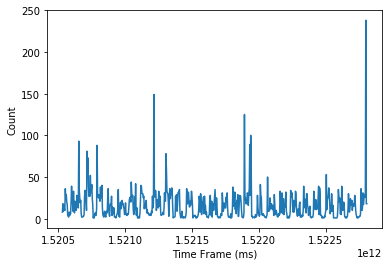

Average number of location points (15) in a 1 hour interval
Minimum number of location points (1) occurred at times 2018-03-11 05:36:12 - 2018-03-11 06:36:17
Maximum number of location points (238) occurred at times 2018-04-03 20:26:05 - 2018-04-03 21:26:10


In [2]:
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

BIN_SIZE = 3600000         #Splits data into segments of ~1 hour

#Extract a subset of locations
sub_loc_data = [trim_header_loc_data[i] for i in range(SUBSET_SIZE)]
#Extract the timestamps from the data
timestamps = [int(item['timestampMs']) for item in sub_loc_data]
print("Range of Dates:")
print("Start Date: ", datetime.fromtimestamp(min(timestamps)//1000))
print("End Date: ", datetime.fromtimestamp(max(timestamps)//1000))

timestamps = np.asarray(sorted(timestamps))
num_bins = (max(timestamps) - min(timestamps))//BIN_SIZE + 1
bin_threshold = timestamps[0] + BIN_SIZE
counts = np.zeros((num_bins, ), dtype='int')
times = np.linspace(timestamps[0], timestamps[-1], num_bins)
j = 0
for i,_ in enumerate(timestamps):
    if timestamps[i] >= bin_threshold:
        bin_threshold += BIN_SIZE
        j += 1
    counts[j] += 1
    
#Plot the frequency of points taken
plt.plot(times,counts)
plt.xlabel("Time Frame (ms)")
plt.ylabel("Count")
plt.show()

print("Average number of location points (%d) in a 1 hour interval" % np.mean(counts))
print("Minimum number of location points (%d) occurred at times %s - %s" % 
      (min(counts), datetime.fromtimestamp(times[np.argmin(counts)]//1000),
       datetime.fromtimestamp(times[np.argmin(counts)+1]//1000)))
print("Maximum number of location points (%d) occurred at times %s - %s" % 
      (max(counts), datetime.fromtimestamp(times[np.argmax(counts)]//1000),  
       datetime.fromtimestamp(times[np.argmax(counts)+1]//1000)))

#### Note: The last hour of data may seem anamolous however this is actually from when I used Maps for GPS

#### Parsing out the activity data was quite a bit harder than expected. I wonder why the nesting is set up the way it is. Seems to be tacking onto existing systems without much organization

In [109]:
#Extract a subset of activities
sub_act_data = [trim_header_loc_data[i] for i in range(SUBSET_SIZE)]
#Google's storage format for activities is really strange (heavily nested)
activities = [item['activity'] for item in sub_act_data if 'activity' in item.keys()]
#This extracts all the features into a flatter format
activities_flat = [[item for item in x] for x in activities]
#Since not all the entries have the same depth go through the list using a traditional for loop
activities_final = []
timestamps = []
activity = []
extra = []
for x in activities_flat:
    for y in x:
        activities_final.append(y)
        timestamps.append(y['timestampMs'])
        activity.append(y['activity'])
        #Extra is only included in some entries and always the same value (for me)
        if 'extra' in y:
            extra.append(y['extra'])
#Get the count of activity types
types = {}
total_acts = 0
for act in activity:
    for t in act:
        if t['type'] not in types.keys():
            types[t['type']] = 1
        else:
            types[t['type']] += 1
        total_acts += 1
for key in types.keys():
    print("Activity: %s\nCount: %d\nPercentage: %f\n\n" % (key, types[key], types[key]/total_acts * 100))

Activity: IN_VEHICLE
Count: 5642
Percentage: 10.468892


Activity: IN_RAIL_VEHICLE
Count: 5096
Percentage: 9.455773


Activity: UNKNOWN
Count: 5557
Percentage: 10.311172


Activity: TILTING
Count: 3084
Percentage: 5.722450


Activity: ON_BICYCLE
Count: 5113
Percentage: 9.487317


Activity: RUNNING
Count: 4188
Percentage: 7.770954


Activity: IN_ROAD_VEHICLE
Count: 5611
Percentage: 10.411371


Activity: ON_FOOT
Count: 5425
Percentage: 10.066242


Activity: WALKING
Count: 5425
Percentage: 10.066242


Activity: EXITING_VEHICLE
Count: 69
Percentage: 0.128031


Activity: STILL
Count: 8683
Percentage: 16.111554


